# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) 

# Project 1: Standardized Test Analysis

# Problem Statement

College applications are a stressful process that each high school students need to go through if they want to pursue higher education. With all the requirements and actual work demanded from students, it's easy to be unsure or even a little bit lost.
My job is to guide students, help them understand the process, especially when it comes to standardized tests (SAT and ACT).
Based on aquired data and a thorough analysis, I'll tell the students what grades they need to obtain and which are the ideal colleges they should apply to according to the majors they pick.








# Contents:
- Background
- Data Import & Cleaning
- Exploratory Data Analysis
- Data Visualization
- Conclusions and Recommendations

# Background
The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math (source). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section (source). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):

SAT
ACT
Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude (source). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications.

# Data

- sat_act_by_college.csv: Ranges of Accepted ACT & SAT Scores by Colleges
- sat_2019_by_intended_college_major.csv : A list of college majors, the number of applicants and their average SAT scores


The sat_2019 file is the participation rate and SAT scores by states in the year 2019.

The sat_act_by_college file provide a list of colleges and their application policies, if the tests are optional, their number of applicants and their acceptance rate. It also provide each college 25th and 75th percentile for both the SAT and ACT.

# Coding Challenge

1. A function to calculate the mean :

In [1]:
def mean_function(lst):
    mean = sum(lst)/len(lst)
    return mean 

I then test the function created above:

In [2]:
some_integers = [8, 15, 4, 32, 25]

In [3]:
mean_function(some_integers)

16.8

2. A function to calculate the standard deviation :

In [4]:
def standard_dev(numbers):
    mean = sum(numbers)/len(numbers)
    before_sum = [((i - mean)**2) for i in numbers]
    after_sum = sum(before_sum)
    div_after_sum = after_sum / len(numbers)
    std = div_after_sum ** 0.5
    return std

Let me test the standard_dev function:

In [5]:
standard_dev(some_integers)

10.419213022104886

3. A data cleaning function :

In [6]:
def clean_data(string):
    new_format = (float(string.replace('%','')))/100
    return new_format

Let's test the clean data function

In [7]:
clean_data('18%')

0.18

# Data Import & Cleaning

The first step is to import and read the data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The first dataframe I work on is the sat_act_by_college.csv

In [9]:
college_set = pd.read_csv('data/sat_act_by_college.csv')

In [10]:
college_set.head(5)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


I check for missing values

In [11]:
college_set.isnull().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

26 missing values for the 'Applies to class year(s) columns'

I change the columns names to use the isunique method. I want to see the different values in that column containing missing values

In [12]:
new_columns = {str(col) : str(col).lower().replace(' ', '_') for col in college_set.columns}   

college_set.rename(columns= new_columns, inplace=True)

college_set.columns

Index(['school', 'test_optional?', 'applies_to_class_year(s)',
       'policy_details', 'number_of_applicants', 'accept_rate',
       'sat_total_25th-75th_percentile', 'act_total_25th-75th_percentile'],
      dtype='object')

I still got some special characters that I want to remove 

In [13]:
college_set.rename(columns = {'test optional?':'test_optional',
                              'applies_to_class_year(s)': 'applies_to_class_years',
                        'sat_total_25th-75th_percentile': 'sat_total_25th_75th_percentile',
                        'act_total_25th-75th_percentile': 'act_total_25th_75th_percentile'} 
                   , inplace = True)
                        
                     

I still have a question mark for the test optional? column; I realize my mistake and fix the code 

In [14]:
college_set.rename( columns = {'test_optional?':'test_optional'},\
                   inplace = True)

The names of all columns are lowercased and the space has been replaced by an underscore

Now I can check the unique values of the applies_to_class_years column

In [15]:
college_set.applies_to_class_years.unique()

array(['2021', '2021 2022', 'All / Permanent Policy',
       '2021 2022 2023 2024', '2021 2022 2023',
       '2021 2022 2023 2024 2025', nan], dtype=object)

2021 is not a the unique value but I can deduct that the missing values could be replaced by 2021 because all the other values start at least with that year

In [16]:
college_set = college_set.fillna(2021)

In [17]:
college_set.isnull().sum()

school                            0
test_optional                     0
applies_to_class_years            0
policy_details                    0
number_of_applicants              0
accept_rate                       0
sat_total_25th_75th_percentile    0
act_total_25th_75th_percentile    0
dtype: int64

There are no other null values. 

There are applies_to_class_years values equal to 'All/Permanent policy' and some equal
'2021 2022 2023 2024' or '2021 2022 2023'. I assume that if they are recorded in the dataframe 
they must apply to 2021. I can change all values in applies_to_class_years to 2021.

In [18]:
college_set['applies_to_class_years'] = 2021

I check the type of each columns 

In [19]:
college_set.dtypes

school                            object
test_optional                     object
applies_to_class_years             int64
policy_details                    object
number_of_applicants               int64
accept_rate                       object
sat_total_25th_75th_percentile    object
act_total_25th_75th_percentile    object
dtype: object

I change the accept rate type from strings with '%' to percentage in float 

In [20]:
college_set['accept_rate']\
.replace('%','',regex=True, inplace = True)

In [21]:
college_set['accept_rate'] = college_set['accept_rate']\
.astype(float)

In [22]:
college_set['accept_rate'] = college_set['accept_rate']\
.div(100)

In [23]:
college_set.head(5)

,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_25th_75th_percentile,act_total_25th_75th_percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35


The accept rate format is correct 

Now I format the SAT and ACT percentile columns by separating them into two different columns for each and turning them into float type. To separate the 25th and 75th percentile columns; I create two temporary dataframes: sat_percentile_dividersat_percentile_divider and act_percentile_divider

In [24]:
sat_percentile_divider = college_set['sat_total_25th_75th_percentile']\
.str.split('-', expand=True)

In [25]:
sat_percentile_divider.head()

,0,1,2
0,1440,1570,None
1,1460,1580,None
2,1440,1570,None
3,1450,1560,None
4,1460,1570,None


I change the column name of these divided columns before I join them to the big dataframe

In [26]:
sat_percentile_divider.rename(columns = {0: 'sat_total_25th_percentile', 
                                         1: 'sat_total_75th_percentile'},
                              inplace=True)

Let's remove the column named 2

In [27]:
sat_percentile_divider.drop(columns = 2, inplace= True)

In [28]:
sat_percentile_divider

,sat_total_25th_percentile,sat_total_75th_percentile
0,1440,1570
1,1460,1580
2,1440,1570
3,1450,1560
4,1460,1570
...,...,...
411,950,1130
412,990,1180
413,1050,1270
414,1060,1280


let's change the type to float as well 

to do this I must get rid of a special character (\u200b\u200b)

In [29]:
sat_percentile_divider.replace('(\u200b\u200b)',''\
                               ,regex=True, inplace = True)

There is another special character  ''  that I need to remove to convert the data into float 

In [30]:
 sat_percentile_divider = sat_percentile_divider[sat_percentile_divider\
                                                 ['sat_total_25th_percentile']\
                                                 != '']

In [31]:
 sat_percentile_divider = sat_percentile_divider[sat_percentile_divider\
                                                 ['sat_total_75th_percentile']\
                                                 != '']

We finally can do the conversion 

In [32]:
 sat_percentile_divider['sat_total_25th_percentile'] = sat_percentile_divider\
    ['sat_total_25th_percentile'].astype('float') 

In [33]:
sat_percentile_divider['sat_total_75th_percentile'] = sat_percentile_divider\
['sat_total_75th_percentile'].astype('float') 

Let's join this dataframe to the main dataframe college_set

In [34]:
college_set = college_set.join(sat_percentile_divider)

In [35]:
college_set.head(2)

,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_25th_75th_percentile,act_total_25th_75th_percentile,sat_total_25th_percentile,sat_total_75th_percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35,1440.0,1570.0
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35,1460.0,1580.0


As seen above; I have two new columns which are the SAT 25th and 75th percentile separated; I can now drop the SAT column where the percentile are combined.

In [36]:
college_set.drop(columns = 'sat_total_25th_75th_percentile',\
                 inplace=True)

let's also delete sat_percentile_divider

In [37]:
del sat_percentile_divider

Let's repeat this entire process for the ACT percentile column. First separate it and then change the type to float with removal of special characters

In [38]:
act_percentile_divider = college_set['act_total_25th_75th_percentile']\
.str.split('-', expand=True)

Separated the column in two in a new dataframe

I rename the columns

In [39]:
act_percentile_divider.rename(columns = {0: 'act_total_25th_percentile',
                                         1: 'act_total_75th_percentile' },
                              inplace=True)

I have renamed the columns; now I drop the column 2 

In [40]:
act_percentile_divider.drop(columns = 2 , inplace = True)

Now let's take care of the data type; I need to check if there are any special characters first 

In [41]:
act_percentile_divider['act_total_25th_percentile'].unique()

array(['32', '33', '35', '34', '31', '29', '27', '30', '28', '26', '',
       '25', '22', '19', '15', '20', '24', '23', '21', '16', '17', '18',
       '19.3'], dtype=object)

one value is equal to '' here; I remove it 

In [42]:
act_percentile_divider = act_percentile_divider[act_percentile_divider\
                                                ['act_total_75th_percentile'] != '']

In [43]:
act_percentile_divider['act_total_25th_percentile'].unique()

array(['32', '33', '35', '34', '31', '29', '27', '30', '28', '26', '25',
       '22', '19', '15', '20', '24', '23', '21', '16', '17', '18', '19.3'],
      dtype=object)

No more '' !

Let's convert the two ACT columns into float 

In [44]:
act_percentile_divider['act_total_25th_percentile'] =  act_percentile_divider\
['act_total_25th_percentile'].astype('float') 

In [45]:
act_percentile_divider['act_total_75th_percentile'] =  act_percentile_divider\
['act_total_75th_percentile'].astype('float') 

Let's join this ACT divider dataframe to the main dataframe college_set

In [46]:
college_set = college_set.join(act_percentile_divider)

Now that we have the separated act percentile columns, let's drop the act combined percentile column 

In [47]:
college_set.drop(columns = 'act_total_25th_75th_percentile',\
                 inplace = True)

let's delete act_percentile_divider:

In [48]:
del act_percentile_divider

In [49]:
college_set.dtypes

school                        object
test_optional                 object
applies_to_class_years         int64
policy_details                object
number_of_applicants           int64
accept_rate                  float64
sat_total_25th_percentile    float64
sat_total_75th_percentile    float64
act_total_25th_percentile    float64
act_total_75th_percentile    float64
dtype: object

Let's turn the test optional column into a boolean

In [50]:
college_set['test_is_optional'] = np.where(college_set['test_optional']\
                                           .str.contains('Yes'), 1, 0)

Now there are two columns with test optional; let's get rid of the one with string to avoid redundancy 

In [51]:
college_set.drop(columns = 'test_optional', inplace = True)

In [52]:
college_set.isnull().sum()

school                       0
applies_to_class_years       0
policy_details               0
number_of_applicants         0
accept_rate                  0
sat_total_25th_percentile    6
sat_total_75th_percentile    6
act_total_25th_percentile    6
act_total_75th_percentile    6
test_is_optional             0
dtype: int64

As seen above; There are some missing values for the sat and act percentile columns. I drop these rows for conveniency 

In [53]:
college_set.dropna(inplace=True)

Now let's save this dataframe to a csv file 

In [54]:
college_set.to_csv('data/college_sat_new.csv')

Now let's clean the second dataframe !

first let's import and read it

In [55]:
intended_majors = pd.read_csv('data/sat_2019_by_intended_college_major.csv')

In [56]:
intended_majors.head(5)

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


is there any null values ? 

In [57]:
intended_majors.isnull().sum()

IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

apparently not ! let's check the data type !

In [58]:
intended_majors.dtypes

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

Alright, the test takers column should be numerical; the percent should be float ! 

First let's change the columns names so everything is lowercased with no space

In [59]:
intended_majors.rename( columns = {'IntendedCollegeMajor':'intended_college_major',
                                   'TestTakers': 'test_takers', 'Percent':'percent',
                                   'Total':'total', 'ReadingWriting': 'reading_writing',
                                   'Math':'math'},
                       inplace = True) 
                       

New columns names !! Now let's do some conversion, first the test_takers:

to convert it to integers we need to remove the commas !

In [60]:
intended_majors['test_takers'] = intended_majors['test_takers'].\
str.replace(',','')

In [61]:
intended_majors.head(2)

,intended_college_major,test_takers,percent,total,reading_writing,math
0,"Agriculture, AgricultureOperations, and Relate...",24913,1%,977,496,481
1,Architecture and Related Services,28988,2%,1047,520,527


No more commas; let's turn the column into a int type 

In [62]:
intended_majors['test_takers'] = intended_majors['test_takers'].astype('int64')

In [63]:
intended_majors.dtypes

intended_college_major    object
test_takers                int64
percent                   object
total                      int64
reading_writing            int64
math                       int64
dtype: object

let's turn the percent column to float; first let's remove the % sign 

In [64]:
intended_majors['percent'] = intended_majors['percent']\
.str.replace('%','')

now let's convert the percent column to float:

In [65]:
intended_majors['percent'] = intended_majors['percent']\
.astype('float')

In [66]:
intended_majors['percent'] = intended_majors['percent']\
.div(100)

In [67]:
intended_majors.dtypes

intended_college_major     object
test_takers                 int64
percent                   float64
total                       int64
reading_writing             int64
math                        int64
dtype: object

Let's save the intended_majors dataframe to a csv file:

In [68]:
intended_majors.to_csv('data/intended_majors.csv')

# Data Dictionary 

|Feature     | Type      | dataset   | Description          |
|------------|-----------|-----------|----------------------|
|  school    | object    | college_set | Name of the college| 
  applies_class_years | int64 |  college_set | years in which the policies apply to 
  policy_details | object | college_set | requirements per colleges for acceptance
  number_of_applicants | int64 | college_set | number of person that applied to this particular college
  accept_rate | float | college_set | The rate of acceptance for each colleges
  sat_total_25th_percentile | float | college_set |25th percentile SAT score for each colleges
  sat_total_75th_percentile | float |college_set |75th percentile SAT score for each colleges
  act_total_25th_percentile | float | college_set |25th percentile ACT score for each colleges
  act_total_75th_percentile	| float | college_set |75th percentile ACT score for each colleges
  test_is_optional | int64 | college_set | value indicating if the standardized test are optional for each college
  intended_college_major | object | intended_majors |name of college major
  test_takers | int64 | intended_majors | number of student applying for the corresponding major
  percent | float | intended_majors | percentage of students that applied to the corresponding major
  total | int64 | intended_majors | combined score SAT score
  reading_writing | int64 | intended_majors | reading and writing SAT score 
  math | int64 | intended_majors | math SAT score 
  
  
  
  
  


# Exploratory Data Analysis

1. Summary Statistics

let's print the summary statistics for each dataframe

In [69]:
college_set.describe().T

,count,mean,std,min,25%,50%,75%,max
applies_to_class_years,405.0,2021.000000,0.000000,2021.000,2021.000,2021.000,2021.000,2021.000
number_of_applicants,405.0,17339.239506,17187.633091,211.000,5208.000,11478.000,23583.000,111322.000
accept_rate,405.0,0.554116,0.242055,0.043,0.374,0.611,0.742,0.999
sat_total_25th_percentile,405.0,1167.934568,129.923812,793.000,1070.000,1150.000,1250.000,1530.000
sat_total_75th_percentile,405.0,1359.644444,111.478484,1050.000,1270.000,1350.000,1440.000,1580.000
act_total_25th_percentile,405.0,24.739012,4.136562,15.000,22.000,24.000,28.000,35.000
act_total_75th_percentile,405.0,29.910617,3.158794,19.000,28.000,30.000,32.000,36.000
test_is_optional,405.0,0.938272,0.240959,0.000,1.000,1.000,1.000,1.000


Some of the relevant information here is the mean of test_is_optional column where 94% of the colleges have an optional policy.
The minimum of the SAT 75th percentile is 1050 and 19 for the ACT.
The maximum number of applicants for one college is 11322 students.

In [70]:
intended_majors.describe().T

,count,mean,std,min,25%,50%,75%,max
test_takers,38.0,48394.500000,72753.092558,283.0,6611.00,16370.50,60215.750,331026.00
percent,38.0,0.025789,0.039975,0.0,0.00,0.01,0.035,0.18
total,38.0,1058.500000,82.445969,916.0,988.25,1066.50,1115.500,1242.00
reading_writing,38.0,535.500000,41.362439,458.0,501.25,537.00,569.750,597.00
math,38.0,523.000000,43.386385,456.0,486.50,527.00,542.250,646.00


Here we learn more about the intended_majors dataframe. There are 38 majors listed.
The most popular major is selected by 18% of all aplicants.

2. dictionary comprehension to apply the standard deviation function to each numeric column in both dataframes.

In [71]:
{column: standard_dev(college_set[column])\
 for column in list(college_set.columns)[3:]} 

{'number_of_applicants': 17166.400676527417,
 'accept_rate': 0.24175568498775526,
 'sat_total_25th_percentile': 129.76331270270018,
 'sat_total_75th_percentile': 111.34077154127958,
 'act_total_25th_percentile': 4.131452261611048,
 'act_total_75th_percentile': 3.1548920842724386,
 'test_is_optional': 0.2406615887607152}

In [72]:
{column: standard_dev(intended_majors[column]) for column\
 in list(intended_majors.columns)[1:]} 

{'test_takers': 71789.43289002257,
 'percent': 0.03944560404747735,
 'total': 81.35392139482761,
 'reading_writing': 40.814567832679806,
 'math': 42.811705236572365}

3. I investigate the trends in the data.

Let's observe the 10 most difficult colleges to get into

In [73]:
college_set.loc[:, ['school','number_of_applicants', 'accept_rate',
        'sat_total_25th_percentile', 'sat_total_75th_percentile',
        'act_total_25th_percentile', 'act_total_75th_percentile',
        'test_is_optional']].sort_values('accept_rate',
                                         ascending= True).head(10)

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile,act_total_25th_percentile,act_total_75th_percentile,test_is_optional
0,Stanford University,47452,0.043,1440.0,1570.0,32.0,35.0,1
1,Harvard College,42749,0.047,1460.0,1580.0,33.0,35.0,1
2,Princeton University,35370,0.055,1440.0,1570.0,32.0,35.0,1
3,Columbia University,40203,0.055,1450.0,1560.0,33.0,35.0,1
4,Yale University,36844,0.061,1460.0,1570.0,33.0,35.0,1
5,California Institute of Technology,8367,0.064,1530.0,1560.0,35.0,36.0,1
6,Massachusetts Institute of Technology,21706,0.067,1500.0,1570.0,34.0,36.0,1
7,Brown University,38674,0.071,1440.0,1570.0,33.0,35.0,1
8,University of Chicago,32283,0.073,1490.0,1570.0,33.0,35.0,1
9,Pomona College,10401,0.074,1390.0,1540.0,32.0,35.0,1


Stanford University has the lowest acceptance rate of all colleges 
even though Harvard has the highest SAT 75th percentile: 1580.
The values are more similar accross these 10 colleges for the ACT where California Institute
of Technology has the highest ACT 75th percentile score at 36. Stanford also has the highest number of applicants with
47452 students applications. All the top 10 colleges with the lowest accept rate have an optional test policy 

Let's observe the colleges with the most number of applicants:

In [74]:
college_set.loc[:, ['school','number_of_applicants', 'accept_rate',
        'sat_total_25th_percentile', 'sat_total_75th_percentile',
        'act_total_25th_percentile', 'act_total_75th_percentile',
        'test_is_optional']].sort_values('number_of_applicants', 
                                         ascending= False).head(10)

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile,act_total_25th_percentile,act_total_75th_percentile,test_is_optional
24,University of California—​Los Angeles,111322,0.123,1290.0,1510.0,27.0,34.0,1
72,University of California—​San Diego,97901,0.302,1250.0,1470.0,26.0,33.0,1
69,University of California—​Santa Barbara,93457,0.296,1260.0,1460.0,25.0,33.0,1
33,University of California—​Berkeley,89621,0.148,1300.0,1530.0,28.0,34.0,1
40,New York University,79462,0.162,1370.0,1510.0,30.0,34.0,1
108,University of California—​Davis,76647,0.412,1150.0,1410.0,25.0,31.0,1
135,Pennsylvania State University—​University Park,71903,0.491,1160.0,1370.0,25.0,30.0,1
102,California State University--Long Beach,71297,0.393,1040.0,1250.0,20.0,26.0,1
85,San Diego State University,69842,0.340,1110.0,1320.0,22.0,29.0,1
54,University of Michigan—​Ann Arbor,64972,0.229,1340.0,1530.0,31.0,34.0,1


the University of California - Los Angeles has the highest number of applicants with 111322 demands.
7 out of the top 10 colleges with the most applicants are in California. 4 out of the top 5 of those colleges are in California.
The trend is clear, The colleges in California are really popular.
UCLA, the school with the most demand also has the lowest acceptance rate out of those 10 colleges.
UC Berkeley and University of Michigan have the highest 75% percentile score for the SAT on that list.
For the ACT, UCLA, UC Berkeley and University of Michigan have the highest 75% percentile score.


How many colleges have a mandatory test policy ?

In [75]:
college_set[college_set['test_is_optional'] == 0].count()

school                       25
applies_to_class_years       25
policy_details               25
number_of_applicants         25
accept_rate                  25
sat_total_25th_percentile    25
sat_total_75th_percentile    25
act_total_25th_percentile    25
act_total_75th_percentile    25
test_is_optional             25
dtype: int64

In [76]:
college_set.shape

(405, 10)

25 out of 405 colleges require a mandatory test for acceptance. 
That's only 6% of the colleges.


Let's see the top 10 colleges with the highest 75th percentile score for the ACT:

In [77]:
college_set.loc[:, ['school','number_of_applicants', 'accept_rate',
        'sat_total_25th_percentile', 'sat_total_75th_percentile',
        'act_total_25th_percentile', 'act_total_75th_percentile',
        'test_is_optional']].sort_values('sat_total_75th_percentile',
                                         ascending= False).head(10)

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile,act_total_25th_percentile,act_total_75th_percentile,test_is_optional
1,Harvard College,42749,0.047,1460.0,1580.0,33.0,35.0,1
0,Stanford University,47452,0.043,1440.0,1570.0,32.0,35.0,1
2,Princeton University,35370,0.055,1440.0,1570.0,32.0,35.0,1
4,Yale University,36844,0.061,1460.0,1570.0,33.0,35.0,1
35,Washington University in St. Louis,31320,0.150,1470.0,1570.0,32.0,35.0,1
6,Massachusetts Institute of Technology,21706,0.067,1500.0,1570.0,34.0,36.0,1
7,Brown University,38674,0.071,1440.0,1570.0,33.0,35.0,1
8,University of Chicago,32283,0.073,1490.0,1570.0,33.0,35.0,1
31,Harvey Mudd College,4045,0.137,1490.0,1570.0,33.0,35.0,1
13,Duke University,35767,0.089,1450.0,1570.0,33.0,35.0,1


As we previously observed; Harvard has the highest 75th percentile score for the SAT.
the mean of the 75th percentile for these colleges is :

In [78]:
college_set.sort_values('sat_total_75th_percentile', ascending = False)[:10]\
.sat_total_75th_percentile.mean()

1571.0

Let's explore the other dataframe, intended_majors showing the college majors, the number of students applying to these majors and their average SAT scores

What are the 5 majors with the highest percentage of test takers ?

In [79]:
intended_majors.loc[:, ['intended_college_major','test_takers', 'percent',
        'total', 'reading_writing', 'math'
        ]].sort_values('percent', ascending= False).head(5)

,intended_college_major,test_takers,percent,total,reading_writing,math
14,Health Professions and related Clinical Sciences,331026,0.18,1048,529,518
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537
9,Engineering,194127,0.11,1139,559,581
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566
35,"Visual and Performing Arts, General",130642,0.07,1045,536,510


The five majors with the most test takers are Health profession, Business,
Engineering, Biological and Biomedical Sciences and Visual and Performing Arts.

What are the majors with the highest average of total SAT scores ?

In [80]:
intended_majors.loc[:, ['intended_college_major','test_takers', 'percent',
        'total', 'reading_writing', 'math'
        ]].sort_values('total', ascending= False).head(5)

,intended_college_major,test_takers,percent,total,reading_writing,math
19,Mathematics and Statistics,16508,0.01,1242,597,646
27,Physical Sciences,26318,0.01,1203,597,606
32,Social Sciences,33356,0.02,1164,594,570
6,Computer and Information Sciences and Support ...,79736,0.04,1156,571,585
22,Multi/Interdisciplinary Studies,2979,0.00,1155,581,574


The Mathematics and Statistics major is the one with the highest average total SAT score.
These are mostly STEM related majors like physical science and computer science.
It requires a lot of work which is why they have the highest average of SAT scores.

What if you are not into math ?
What are the majors with the highest average of reading and writing SAT scores ?

In [81]:
intended_majors.loc[:, ['intended_college_major','test_takers', 'percent',
        'total', 'reading_writing', 'math'
        ]].sort_values('reading_writing', ascending= False).head(5)

,intended_college_major,test_takers,percent,total,reading_writing,math
19,Mathematics and Statistics,16508,0.01,1242,597,646
27,Physical Sciences,26318,0.01,1203,597,606
32,Social Sciences,33356,0.02,1164,594,570
11,English Language and Literature/Letters,16233,0.01,1119,585,533
17,"Liberal Arts and Sciences, General Studies and...",8611,0.00,1140,584,556


The Mathematics and Statistics major is the one with the highest average of reading and writing SAT score.
English/Litterature and Liberal Arts are only coming up third showing that you have to be an all around student in order to get a good SAT score even if your desired major is not science related !

# Data Visualisation

I'm interested in the relationship SAT 75th percentile and number of applicants.
Let's represent it with a scatter plot:

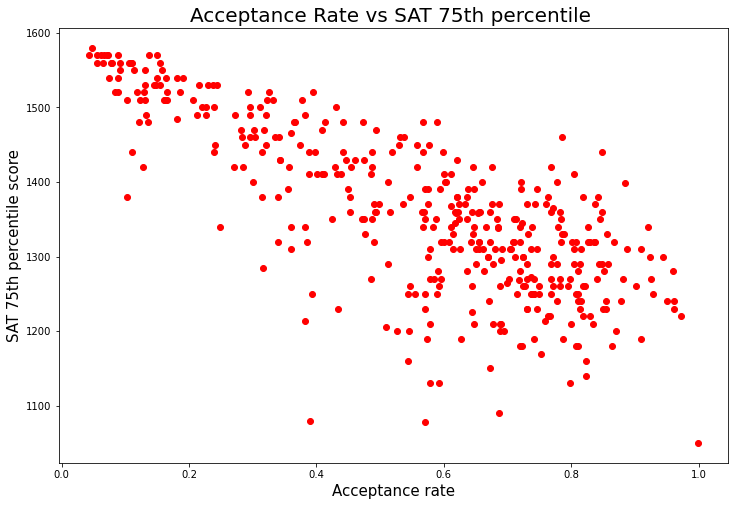

In [82]:
plt.figure(figsize=(12, 8))
plt.scatter( college_set['accept_rate'], college_set['sat_total_75th_percentile'], color = "red")
plt.title('Acceptance Rate vs SAT 75th percentile ', fontsize=20)
plt.ylabel('SAT 75th percentile score', fontsize = 15)
plt.xlabel('Acceptance rate', fontsize = 15);

The colleges with the lowest acceptance rate also have the highest SAT 75th percentile scores.
Colleges with higher acceptance rate haver lower 75th percentile scores.

What is the distribution of the colleges SAT 75th percentile scores ?
Let's represent it with a histogram :

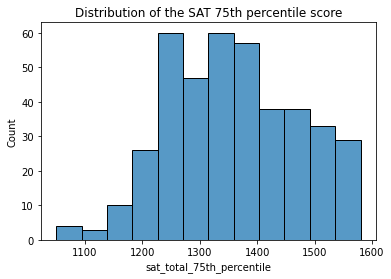

In [83]:
sns.histplot(data = college_set , x = "sat_total_75th_percentile")
plt.title('Distribution of the SAT 75th percentile score');

Most values are between 1250 and 1400. The mean of these scores is 13560. Students would be in Jeopardy with a SAT score lower than 1200.

Let's observe the distribution of the colleges ACT 75th percentile scores:

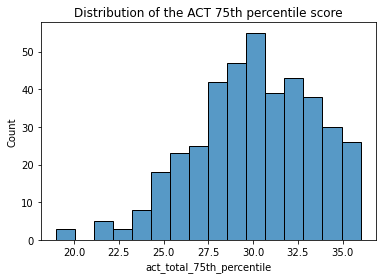

In [84]:
sns.histplot(data = college_set , x = "act_total_75th_percentile")
plt.title('Distribution of the ACT 75th percentile score');

The highest value is 30 and most scores are between 28.75 and 33.75.
The average of the ACT 75th percentile score is 29.9.
Any score below 25-26 would put a student in jeopardy.

Let's observe the college majors with the most test takers with a bar chart :

In [85]:
popular_majors = intended_majors.loc[:, ['intended_college_major','test_takers', 'percent',
        'total', 'reading_writing', 'math'
        ]].sort_values('percent', ascending= False).head(5)

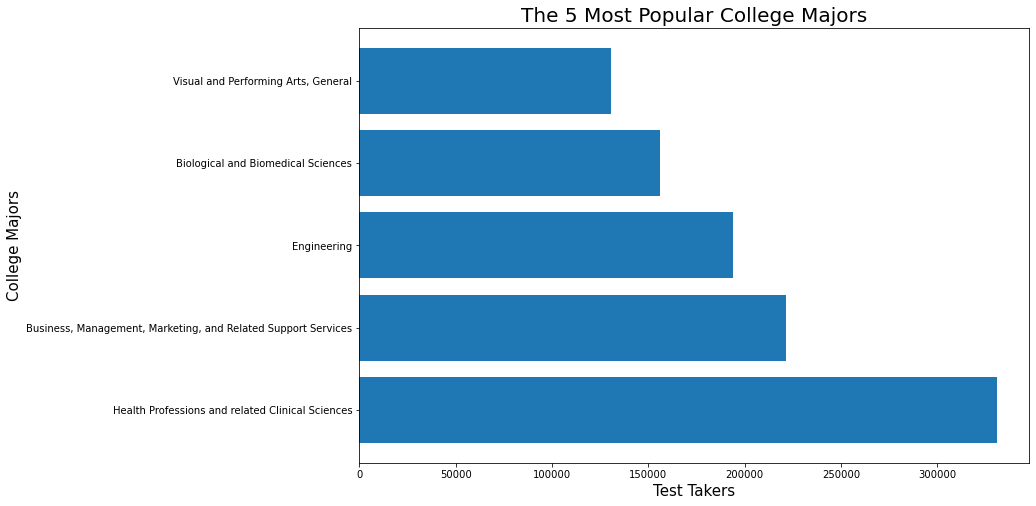

In [95]:
plt.figure(figsize=(12, 8))
plt.title('The 5 Most Popular College Majors', fontsize=20)
plt.barh(popular_majors['intended_college_major'], popular_majors['test_takers'])
plt.xlabel('Test Takers', fontsize=15)
plt.ylabel('College Majors', fontsize=15);

These five majors account to 56% of the test takers. They clearly are the most poupular.
The majority of the test takers are mostly interested in STEM and businees studies

# Conclusions and Recommendations

The majority of the colleges studied in this analysis have an optional test policy and only 6% of these colleges required a test for admission. 

Even though these standardized test are no longer mandatory going forward; I would still advise students to take the test to increase their chance to reach their desired colleges and majors.
Especially for those wanting to go to California; where the colleges have the most applicant.

I would also tell them to focus on the 75th percentile of the school they want to get into to have the most chance to get in.
95% of the SAT 75th percentile score  for the colleges are between 1136.8 and 1582.4 and between 23.6 and 36.2.

I would advise any applicants to reach for a minimum of 1200 for the SAT and 24 for the ACT combined score.
STEM and Business majors have the most applicants and the highest SAT/ACT scores in math and reading.

I would advise students to have good score across discipline even if you're not interested in a science or business major as math is an important part of the test.
